In [371]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [372]:
url=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav')
url

<Response [403]>

In [373]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTM, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
url=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav', headers=headers).text

soup=BeautifulSoup(url, 'html.parser')

soup2=BeautifulSoup(soup.prettify(), 'html.parser')


In [374]:
# companies on the first page of the website 

for i in soup2.find_all('h2'):
    print(i.text.strip())
    
company=soup.find_all('div', class_='company-info-wrapper')
len(company)

TCS
Accenture
Cognizant
ICICI Bank
HDFC Bank
Wipro
Infosys
Capgemini
Tech Mahindra
Genpact
HCLTech
Amazon
Axis Bank
IBM
Concentrix Corpo...
Reliance jio
Larsen & Toubro ...
HDB Financial Se...
Vodafone Idea
Teleperformance
Reliance Retail
Kotak Mahindra B...
Deloitte
Reliance Industr...
Bharti Airtel
BYJU'S
Tata Motors
Flipkart
WNS
Mahindra & Mahin...


30

In [375]:
# Extracting data from all the pages of the website

final_df=pd.DataFrame()

for j in range(1, 150):
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTM, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    url='https://www.ambitionbox.com/list-of-companies?page={}'.format(j)
    webpage=requests.get(url, headers=headers).text
    
    soup=BeautifulSoup(webpage, 'html.parser')
    
    company=soup.find_all('div', class_='company-content-wrapper')
    
    name=[]
    rating=[]
    review=[]
    ctype=[]
    location=[]
    old_in_years=[]
    employees=[]

    for i in company:
        name.append(i.find('h2', class_='company-name').text.strip())
        rating.append(i.find('p', class_='rating').text.strip())
        review.append(i.find('a', class_='review-count').text.strip())
        try:
            ctype.append(i.find_all('p', class_='infoEntity')[0].text.strip())
        except:
            ctype.append(np.nan)
            
        try:
            location.append(i.find_all('p', class_='infoEntity')[1].text.strip())
        except:
            location.append(np.nan)
            
        try:
            old_in_years.append(i.find_all('p', class_='infoEntity')[2].text.strip())
        except:
            old_in_years.append(np.nan)
        try:
            employees.append(i.find_all('p', class_='infoEntity')[3].text.strip())
        except:
            employees.append(np.nan)
        
    d={'name': name, 'rating': rating, 'review': review, 'ctype': ctype, 'location': location, 'old_in_years':old_in_years, 'employees':employees}
    df=pd.DataFrame(d)
    
    final_df=final_df.append(df, ignore_index=True)

C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_12128\2769601861.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df, ignore_index=True)


In [376]:
final_df.head()

,name,rating,review,ctype,location,old_in_years,employees
0,TCS,3.9,(51.3k Reviews),Public,"Mumbai,Maharashtra + 271 more",55 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(32.8k Reviews),Public,Dublin + 131 more,34 years old,1 Lakh+ Employees (India)
2,Cognizant,3.9,(30.2k Reviews),Private,Teaneck. New Jersey. + 101 more,29 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(34.1k Reviews),Public,"Mumbai,Maharashtra + 1058 more",29 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(40k Reviews),Public,"Mumbai,Maharashtra + 1270 more",29 years old,50k-1 Lakh Employees (India)


In [377]:
final_df.shape

(4469, 7)

### Data Mining

In [378]:
# Finding null values in the dataset

final_df.isnull().mean()*100

name            0.000000
rating          0.000000
review          0.000000
ctype           0.000000
location        0.872678
old_in_years    3.043186
employees       9.398076
dtype: float64

In [379]:
# we have to drop the null values as some values have jumbled up in the middle part of the dataset which has left most of the null values in the 'employees' section.
# I have tried correcting it multiple times but everytime i run the program as fresh , the null values changes, making it hard to correct it. 

final_df.dropna(inplace=True)

In [380]:
final_df.isnull().mean()*100

name            0.0
rating          0.0
review          0.0
ctype           0.0
location        0.0
old_in_years    0.0
employees       0.0
dtype: float64

In [381]:
final_df.shape

(4049, 7)

In [382]:
final_df.head()

,name,rating,review,ctype,location,old_in_years,employees
0,TCS,3.9,(51.3k Reviews),Public,"Mumbai,Maharashtra + 271 more",55 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(32.8k Reviews),Public,Dublin + 131 more,34 years old,1 Lakh+ Employees (India)
2,Cognizant,3.9,(30.2k Reviews),Private,Teaneck. New Jersey. + 101 more,29 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(34.1k Reviews),Public,"Mumbai,Maharashtra + 1058 more",29 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(40k Reviews),Public,"Mumbai,Maharashtra + 1270 more",29 years old,50k-1 Lakh Employees (India)


In [383]:
# Splitting 'Reviews' from every row of the 'review' column.

def review(x):
    return x.split(' ')[0].split('(')[1]

final_df['review']=final_df['review'].apply(review)

In [384]:
# Splitting 'years old' from every row of the 'old_in_years' column.
# Changing the name of the 'old_in_years' column.

def year(x):
    return x.split(' ')[0]

final_df['total_no_of_years']=final_df['old_in_years'].apply(year)

In [385]:
# Splitting 'location' from the 'location' column.
# Also assigning it a new name.

def hq(x):
    return x.split('+')[0]

final_df['Hq']=final_df['location'].apply(hq)

final_df.drop('old_in_years', axis=1, inplace=True)

In [386]:
final_df['Hq'].unique()

array(['Mumbai,Maharashtra ', 'Dublin ', 'Teaneck. New Jersey. ',
       'Bangalore/Bengaluru,Karnataka ', 'Bengaluru/Bangalore,Karnataka ',
       'Paris ', 'Pune,Maharashtra ', 'New York,New York ',
       'Noida,Uttar Pradesh ', 'Seattle,Washington ', 'Armonk,New York ',
       'Fremont,California ', 'Navi Mumbai,Maharashtra ',
       'Ahmedabad,Gujrat ', 'Gandhinagar,Gujrat ',
       'Gurgaon/Gurugram,Haryana ', 'Bangalore,Karnataka ', 'London ',
       'Minato,Tokyo ', 'New Delhi,Delhi ', 'Stockholm,Stockholm County ',
       'Hyderabad/Secunderabad,Telangana ', 'Pittsford,New York ',
       'Chiyoda City,Tokyo ', 'New York City,New York ',
       'Bengaluru/Bangalore ', 'Gurugram ', 'Noida ',
       'Kolkata,West Bengal ', 'Dongguan,Guangdong ',
       'San Francisco,California ', 'Delhi,NCT ', 'Ahmedabad,\xa0India ',
       'Mumbai ', 'Chennai,Tamil Nadu ', 'Jaipur,Rajasthan ',
       'Munich,Bavaria ', 'Houston,Texas ', 'Espoo,Southern Finland ',
       'Austin,Texas ', 'Bangal

In [387]:
# since we can see some of the places are same but are differently spelt.
# So we have to correct the spelling manually to perform proper data visualizations.

final_df.replace('Mumbai ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Navi Mumbai ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Teaneck. New Jersey. ', 'Teaneck,NewJersey', inplace=True)
final_df.replace('Dublin ', 'Dublin,Ireland ', inplace=True)
final_df.replace('Seoul ', 'Seoul,SouthKorea ', inplace=True)
final_df.replace('Seoul,Seoul ', 'Seoul,SouthKorea ', inplace=True)
final_df.replace('Florida ', 'FLorida,USA ', inplace=True)
final_df.replace('Gerlingen ', 'Gerlingen,Baden-Wuerttemberg ', inplace=True)
final_df.replace('Durham ', 'Durham,England ', inplace=True)
final_df.replace('Minnesota ', 'Minnetonka,Minnesota ', inplace=True)
final_df.replace('Frankfurt ', 'Frankfurt,Germany ', inplace=True)
final_df.replace('Charlotte ', 'Charlotte,NorthCarolina ', inplace=True)
final_df.replace('Copenhagen ', 'Copenhagen,Denmark ', inplace=True)
final_df.replace('Issy Les Moulineaux ', 'Issy Les Moulineaux,Paris ', inplace=True)
final_df.replace('Zurich ', 'Zurich,Switzerland ', inplace=True)
final_df.replace('Wong Chuk Hang ', 'Wong Chuk Hang,HongKong ', inplace=True)
final_df.replace('Warren ', 'Warrenburg,Missouri ', inplace=True)
final_df.replace('Allahabad ', 'Allahabad,Uttar Pradesh ', inplace=True)
final_df.replace('Ahmednagar ', 'Ahmednagar,Maharashtra ', inplace=True)
final_df.replace('Thiruvananthapuram ', 'Thiruvananthapuram,AndhraPradesh ', inplace=True)
final_df.replace('Trivandrum/Thiruvananthapuram,Kerala ', 'Thiruvananthapuram,AndhraPradesh ', inplace=True)
final_df.replace('Meerut ', 'Meerut,Uttar Pradesh ', inplace=True)
final_df.replace('Coventry ', 'Coventry,England ', inplace=True)
final_df.replace('California ', 'California,USA ', inplace=True)
final_df.replace('Brisbane ', 'Brisbane,Australia ', inplace=True)
final_df.replace('Dehradun ', 'Dehradun,Uttarakhand ', inplace=True)
final_df.replace('Mysore ', 'Mysore,Karnataka ', inplace=True)
final_df.replace('Sydney ', 'Sydney,New South Wales ', inplace=True)
final_df.replace('Jakarta ', 'Jakarta,Indonesia ', inplace=True)
final_df.replace('Hosur ', 'Hosur,Karnataka ', inplace=True)
final_df.replace('Allahabad/Prayagraj,Uttar Pradesh ', 'Allahabad,Uttar Pradesh ', inplace=True)
final_df.replace('Londonderry ', 'Londonderry,England ', inplace=True)
final_df.replace('Kyoto ', 'Kyoto,Japan ', inplace=True)
final_df.replace('Petaling Jaya ', 'Jaya,Indonesia ', inplace=True)
final_df.replace('Hopkinton ', 'Hopkinton,Massachusetts ', inplace=True)
final_df.replace('Aurangabad ', 'Aurangabad,Maharashtra ', inplace=True)
final_df.replace('Moon Township ', 'Moon Township,Pennsylvania ', inplace=True)
final_df.replace('Bonn ', 'Bonn,Germany ', inplace=True)
final_df.replace('Hertfordshire ', 'Hertfordshire,England ', inplace=True)
final_df.replace('Saint-Ouen ', 'Saint-Ouen,Paris ', inplace=True)
final_df.replace('Herborn ', 'Herborn,Hesse ', inplace=True)
final_df.replace('Plymouth ', 'Plymouth,Devon ', inplace=True)
final_df.replace('Thiruvananthapuram ', 'Thiruvananthapuram,Kerala ', inplace=True)
final_df.replace('Kapurthala\xa0,Punjab ', 'Kapurthala,Punjab ', inplace=True)
final_df.replace('Bilaspur ', 'Bilaspur,Chattisgarh ', inplace=True)
final_df.replace('Cambridge ', 'Cambridge,England ', inplace=True)
final_df.replace('Kanagawa ', 'Kanagawa,Japan ', inplace=True)
final_df.replace('Lucknow ', 'Uttar Pradesh ', inplace=True)
final_df.replace('Wolfratshausen ', 'Wolfratshausen,Bavaria ', inplace=True)
final_df.replace('Velagapudi ', 'Velagapudi,Guntur ', inplace=True)
final_df.replace('Visakhapatnam ', 'Visakhapatnam,AndhraPradesh ', inplace=True)
final_df.replace('Levallois-Perret ', 'Levallois,Perret ', inplace=True)
final_df.replace('Bharuch ', 'Bharuch,Gujarat ', inplace=True)
final_df.replace('Lyngby ', 'Lyngby,Denmark ', inplace=True)
final_df.replace('fuschl ', 'fuschl,Austria ', inplace=True)
final_df.replace('Bengaluru/Bangalore,Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bengaluru ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bangalore,Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bangalore/Bengaluru,Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bangalore ', 'Bengaluru,Karnataka ',inplace=True)
final_df.replace('Bengaluru/Bangalore ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Noida ', 'Noida,Uttar Pradesh ', inplace=True)
final_df.replace('Greater Noida,Uttar Pradesh ', 'Noida,Uttar Pradesh ', inplace=True)
final_df.replace('Navi Mumbai,Maharashtra ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Navi Mumbai ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Nashik ', 'Nashik,Maharashtra ', inplace=True)
final_df.replace('Nasik/Nashik,Maharashtra ', 'Nashik,Maharashtra ', inplace=True)
final_df.replace('Gurgaon/Gurugram,Haryana ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgaon ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('GURGAON ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgram ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgaon/Gurugram,Haryana', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurugram ','Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgaon/Gurugram ','Gurgaon,Haryana ', inplace=True)
final_df.replace('Faridabad ','Faridabad,Haryana ', inplace=True)
final_df.replace('Ahmedabad,Gujrat ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Ahmedabad ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Ahemdabad ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Ahmedabad,\xa0India ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Gujrat ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('New York,New York ','New York City,New York ', inplace=True)
final_df.replace('New York,New York, ','New York City,New York ', inplace=True)
final_df.replace('New York ','New York City,New York ', inplace=True)
final_df.replace('New York','New York City,New York ', inplace=True)
final_df.replace('New York,NY ','New York City,New York ', inplace=True)
final_df.replace('Purchase,New York ','New York City,New York ', inplace=True)
final_df.replace('Chennai ', 'Chennai,Tamil Nadu ', inplace=True)
final_df.replace('Chennai', 'Chennai,Tamil Nadu ', inplace=True)
final_df.replace('Chennai,Tamil Nadu', 'Chennai,Tamil Nadu ', inplace=True)
final_df.replace('Paris ', 'Paris,France ', inplace=True)
final_df.replace('Paris,Ile de France ', 'Paris,France ', inplace=True)
final_df.replace('Paris,√éle-de-France ', 'Paris,France ', inplace=True)
final_df.replace('Paris,Ile-de-France ', 'Paris,France ', inplace=True)
final_df.replace('Delhi,NCT ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi,Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('Delhi/NCR,New Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi,New Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('Pune ', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Lonavla ', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Pune', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Pune,Indore ', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Osaka ', 'Osaka,Japan ', inplace=True)
final_df.replace('Geneva,Geneva ', 'Geneva,Switzerland ', inplace=True)
final_df.replace('Abu Dhabi,Abu Dhabi ', 'Abu Dhabi,UAE ', inplace=True)
final_df.replace('Al Ain,Abu Dhabi ', 'Abu Dhabi,UAE ', inplace=True)
final_df.replace('Abu Dhabi ', 'Abu Dhabi,UAE ', inplace=True)
final_df.replace('Kolkata ', 'West Bengal,Kolkata ', inplace=True)
final_df.replace('Kolkata,India ', 'West Bengal,Kolkata ', inplace=True)
final_df.replace('Kolkata,West Bengal', 'West Bengal,Kolkata ', inplace=True)
final_df.replace('Hyderabad ', 'Hyderabad,Telangana ', inplace=True)
final_df.replace('Hyderabad/Secunderabad ', 'Hyderabad,Telangana ', inplace=True)
final_df.replace('Hyderabad/Secunderabad,Telangana ', 'Hyderabad,Telangana ', inplace=True)
final_df.replace('Tokyo,Tokyo-to ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Tokyo,Tokyo ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Tokyo ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Toyota City,Aichi Prefecture ', 'Tokyo,Japan ', inplace=True)
final_df.replace('London,London ', 'London,England ', inplace=True)
final_df.replace('London ', 'London,England ', inplace=True)
final_df.replace('Dubai,Dubai ', 'Dubai ,UAE ', inplace=True)
final_df.replace('Dubai ', 'Dubai ,UAE ', inplace=True)
final_df.replace('Ota City,Tokyo ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Jodhpur ', 'Jodhpur, Rajasthan ', inplace=True)


In [471]:
# Setting the index in order.

final_df.reset_index()


,index,Company_name,Rating,Reviews,Company_type,Employees,Total_no_of_years,City,State/Country,Locations across the Globe,Work_location
0,0,TCS,3.9,51300,Public,1Lakh+,55,Mumbai,Maharashtra,271,India
1,1,Accenture,4.1,32800,Public,1Lakh+,34,Dublin,Ireland,131,India
2,2,Cognizant,3.9,30200,Private,1Lakh+,29,Teaneck,NewJersey,101,India
3,3,ICICI Bank,4.0,34100,Public,1Lakh+,29,Mumbai,Maharashtra,1058,India
4,4,HDFC Bank,4.0,40000,Public,50k-1Lakh,29,Mumbai,Maharashtra,1270,India
...,...,...,...,...,...,...,...,...,...,...,...
4004,4004,Lifelong India,4.2,120,Private,501-1k,38,Delhi/NCR,Delhi,3,India
4005,4005,Namdev Finvest,4.8,120,Private,201-500,26,Jaipur,Rajasthan,21,India
4006,4006,Carnival Group,3.8,126,Private,51-200,16,Mumbai,Maharashtra,33,India
4007,4007,National Securit...,3.5,119,Private,201-500,27,Mumbai,Maharashtra,4,India


In [389]:
# Separating the values of 'Hq' for better visualization.

new=final_df['Hq'].str.split(',', n=1, expand=True)
new

,0,1
0,Mumbai,Maharashtra
1,Dublin,Ireland
2,Teaneck,NewJersey
3,Mumbai,Maharashtra
4,Mumbai,Maharashtra
...,...,...
4463,Delhi/NCR,Delhi
4465,Jaipur,Rajasthan
4466,Mumbai,Maharashtra
4467,Mumbai,Maharashtra


In [390]:
final_df['city']=new[0]

In [391]:
final_df['State']=new[1]

In [392]:
final_df.head()

,name,rating,review,ctype,location,employees,total_no_of_years,Hq,city,State
0,TCS,3.9,51.3k,Public,"Mumbai,Maharashtra + 271 more",1 Lakh+ Employees (India),55,"Mumbai,Maharashtra",Mumbai,Maharashtra
1,Accenture,4.1,32.8k,Public,Dublin + 131 more,1 Lakh+ Employees (India),34,"Dublin,Ireland",Dublin,Ireland
2,Cognizant,3.9,30.2k,Private,Teaneck. New Jersey. + 101 more,1 Lakh+ Employees (India),29,"Teaneck,NewJersey",Teaneck,NewJersey
3,ICICI Bank,4.0,34.1k,Public,"Mumbai,Maharashtra + 1058 more",1 Lakh+ Employees (India),29,"Mumbai,Maharashtra",Mumbai,Maharashtra
4,HDFC Bank,4.0,40k,Public,"Mumbai,Maharashtra + 1270 more",50k-1 Lakh Employees (India),29,"Mumbai,Maharashtra",Mumbai,Maharashtra


In [393]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4049 entries, 0 to 4468
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4049 non-null   object
 1   rating             4049 non-null   object
 2   review             4049 non-null   object
 3   ctype              4049 non-null   object
 4   location           4049 non-null   object
 5   employees          4049 non-null   object
 6   total_no_of_years  4049 non-null   object
 7   Hq                 4049 non-null   object
 8   city               4049 non-null   object
 9   State              3723 non-null   object
dtypes: object(10)
memory usage: 348.0+ KB


In [394]:
# Converting the object data type to integer

final_df['rating']=final_df['rating'].astype('float')
final_df['total_no_of_years']=final_df['total_no_of_years'].astype('int')

In [395]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4049 entries, 0 to 4468
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               4049 non-null   object 
 1   rating             4049 non-null   float64
 2   review             4049 non-null   object 
 3   ctype              4049 non-null   object 
 4   location           4049 non-null   object 
 5   employees          4049 non-null   object 
 6   total_no_of_years  4049 non-null   int32  
 7   Hq                 4049 non-null   object 
 8   city               4049 non-null   object 
 9   State              3723 non-null   object 
dtypes: float64(1), int32(1), object(8)
memory usage: 332.1+ KB


In [396]:
# Renaming the columns for better readability 

final_df.rename(columns={'name':'Company_name', 'review':'Reviews','rating':'Rating', 'ctype':'Company_type','location':'Total_Locations', 'employees':'Employees','total_no_of_years':'Total_no_of_years'}, inplace=True)


In [397]:
final_df.head(1)

,Company_name,Rating,Reviews,Company_type,Total_Locations,Employees,Total_no_of_years,Hq,city,State
0,TCS,3.9,51.3k,Public,"Mumbai,Maharashtra + 271 more",1 Lakh+ Employees (India),55,"Mumbai,Maharashtra",Mumbai,Maharashtra


In [398]:
# Separating the 'Total_Locations' to get the integer part.

location=final_df['Total_Locations'].str.split('+', n=1, expand=True)
location

,0,1
0,"Mumbai,Maharashtra",271 more
1,Dublin,131 more
2,Teaneck. New Jersey.,101 more
3,"Mumbai,Maharashtra",1058 more
4,"Mumbai,Maharashtra",1270 more
...,...,...
4463,"Delhi/NCR,Delhi",3 more
4465,"Jaipur,Rajasthan",21 more
4466,Mumbai,33 more
4467,"Mumbai,Maharashtra",4 more


In [399]:
final_df['Locations across the Globe']=location[1].str.replace('more', '')

In [400]:
final_df.head()

,Company_name,Rating,Reviews,Company_type,Total_Locations,Employees,Total_no_of_years,Hq,city,State,Locations across the Globe
0,TCS,3.9,51.3k,Public,"Mumbai,Maharashtra + 271 more",1 Lakh+ Employees (India),55,"Mumbai,Maharashtra",Mumbai,Maharashtra,271
1,Accenture,4.1,32.8k,Public,Dublin + 131 more,1 Lakh+ Employees (India),34,"Dublin,Ireland",Dublin,Ireland,131
2,Cognizant,3.9,30.2k,Private,Teaneck. New Jersey. + 101 more,1 Lakh+ Employees (India),29,"Teaneck,NewJersey",Teaneck,NewJersey,101
3,ICICI Bank,4.0,34.1k,Public,"Mumbai,Maharashtra + 1058 more",1 Lakh+ Employees (India),29,"Mumbai,Maharashtra",Mumbai,Maharashtra,1058
4,HDFC Bank,4.0,40k,Public,"Mumbai,Maharashtra + 1270 more",50k-1 Lakh Employees (India),29,"Mumbai,Maharashtra",Mumbai,Maharashtra,1270


In [401]:
final_df.drop(columns=['Total_Locations', 'Hq'], inplace=True)

In [402]:
final_df.head()

,Company_name,Rating,Reviews,Company_type,Employees,Total_no_of_years,city,State,Locations across the Globe
0,TCS,3.9,51.3k,Public,1 Lakh+ Employees (India),55,Mumbai,Maharashtra,271
1,Accenture,4.1,32.8k,Public,1 Lakh+ Employees (India),34,Dublin,Ireland,131
2,Cognizant,3.9,30.2k,Private,1 Lakh+ Employees (India),29,Teaneck,NewJersey,101
3,ICICI Bank,4.0,34.1k,Public,1 Lakh+ Employees (India),29,Mumbai,Maharashtra,1058
4,HDFC Bank,4.0,40k,Public,50k-1 Lakh Employees (India),29,Mumbai,Maharashtra,1270


In [404]:
# Replacing the extra space in the data.

final_df['city']=final_df['city'].str.replace(' ','')

In [406]:
# Replacing the extra space in the data.

final_df['State']=final_df['State'].str.replace(' ', '')

In [407]:
# Replacing the extra space in the data.

final_df['Locations across the Globe']=final_df['Locations across the Globe'].str.replace(' ','')

In [408]:
final_df['Locations across the Globe'].unique()

array(['271', '131', '101', '1058', '1270', '225', '125', '79', '211',
       '68', '140', '377', '1107', '121', '70', '997', '528', '800',
       '567', '705', '477', '502', '529', '258', '388', '450', '24',
       '421', '570', '72', '56', '73', '371', '414', '52', '683', '165',
       '38', '51', '133', '41', '187', '366', '321', '316', '345', '42',
       '419', '400', '132', '65', '15', '32', '269', '67', '629', '60',
       '235', '26', '362', '244', '379', '504', '566', '326', '19', '11',
       '478', '117', '689', '157', '139', '327', '50', '298', '161',
       '122', '85', '307', '31', '169', '46', '97', '33', '55', '205',
       '370', '59', '197', '266', '135', '240', '29', '25', '418', '105',
       '229', '83', '208', '268', '14', '402', '252', '354', '405', '200',
       '84', '10', '111', '53', '21', '113', '250', '88', '500', '30',
       '71', '296', '104', '204', '80', '45', '185', '12', '438', '444',
       '497', '434', '76', '396', '23', '213', '260', '184', '61',

In [409]:
final_df.isnull().sum()

Company_name                    0
Rating                          0
Reviews                         0
Company_type                    0
Employees                       0
Total_no_of_years               0
city                            0
State                         326
Locations across the Globe     38
dtype: int64

In [410]:
# Replacing the null values in the 'State' column with the values in the 'city' column.

final_df['State']= np.where(final_df['State'].isnull(), final_df['city'], final_df['State'])

In [411]:
final_df.isnull().sum()

Company_name                   0
Rating                         0
Reviews                        0
Company_type                   0
Employees                      0
Total_no_of_years              0
city                           0
State                          0
Locations across the Globe    38
dtype: int64

In [412]:
final_df.dropna(inplace=True)

In [413]:
final_df.isnull().sum()

Company_name                  0
Rating                        0
Reviews                       0
Company_type                  0
Employees                     0
Total_no_of_years             0
city                          0
State                         0
Locations across the Globe    0
dtype: int64

In [414]:
final_df.shape

(4011, 9)

In [415]:
final_df.head()

,Company_name,Rating,Reviews,Company_type,Employees,Total_no_of_years,city,State,Locations across the Globe
0,TCS,3.9,51.3k,Public,1 Lakh+ Employees (India),55,Mumbai,Maharashtra,271
1,Accenture,4.1,32.8k,Public,1 Lakh+ Employees (India),34,Dublin,Ireland,131
2,Cognizant,3.9,30.2k,Private,1 Lakh+ Employees (India),29,Teaneck,NewJersey,101
3,ICICI Bank,4.0,34.1k,Public,1 Lakh+ Employees (India),29,Mumbai,Maharashtra,1058
4,HDFC Bank,4.0,40k,Public,50k-1 Lakh Employees (India),29,Mumbai,Maharashtra,1270


In [416]:
# Replacing the k with a 1000 and also multiplying it with the respective no.

final_df['Reviews']=final_df["Reviews"].replace({"k":"*1e3"}, regex=True).map(pd.eval).astype(int)

In [417]:
final_df['Locations across the Globe']=final_df['Locations across the Globe'].astype('int')
final_df['Reviews']=final_df['Reviews'].astype('int')

In [418]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4011 entries, 0 to 4468
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_name                4011 non-null   object 
 1   Rating                      4011 non-null   float64
 2   Reviews                     4011 non-null   int32  
 3   Company_type                4011 non-null   object 
 4   Employees                   4011 non-null   object 
 5   Total_no_of_years           4011 non-null   int32  
 6   city                        4011 non-null   object 
 7   State                       4011 non-null   object 
 8   Locations across the Globe  4011 non-null   int32  
dtypes: float64(1), int32(3), object(5)
memory usage: 266.4+ KB


In [419]:
final_df.rename(columns={'city':'City', 'State':'State/Country'}, inplace=True)

In [469]:
final_df.sample(5)

,Company_name,Rating,Reviews,Company_type,Employees,Total_no_of_years,City,State/Country,Locations across the Globe,Work_location
2582,My Home Construc...,4.4,188,Private,501-1k,34,Hyderabad,Telangana,9,India
1010,Quest Retail,4.4,466,Private,501-1k,18,Gurgaon,Haryana,58,India
2415,Kogta Financial,4.3,201,Public,1k-5k,27,Jaipur,Rajasthan,66,India
1437,Cigniti Technolo...,4.0,335,Public,1k-5k,25,Irving,Texas,4,India
2728,Global Aluminium,3.9,178,Private,1k-5k,26,Hyderabad,Telangana,5,India


In [421]:
# Removing 'Employees' in the data from the 'Employees' column

final_df['Employees']=final_df['Employees'].str.replace('Employees', '')

In [424]:
final_df['Employees'].value_counts()

1k-5k  (India)          1659
501-1k  (India)          800
201-500  (India)         512
10k-50k  (India)         313
5k-10k  (India)          273
51-200  (India)          253
11-50  (India)            45
1 Lakh+  (India)          44
50k-1 Lakh  (India)       33
1k-5k  (Global)           21
5k-10k  (Global)          17
1-10  (India)             16
201-500  (Global)         11
10k-50k  (Global)          6
501-1k  (Global)           4
1 Lakh+  (Global)          2
50k-1 Lakh  (Global)       1
51-200  (Global)           1
Name: Employees, dtype: int64

In [425]:
#Separating the 'Employees' column into multiple columns to get the desired data.

loc=final_df['Employees'].str.split(' ', n=2, expand=True)
loc

,0,1,2
0,1,Lakh+,(India)
1,1,Lakh+,(India)
2,1,Lakh+,(India)
3,1,Lakh+,(India)
4,50k-1,Lakh,(India)
...,...,...,...
4463,501-1k,,(India)
4465,201-500,,(India)
4466,51-200,,(India)
4467,201-500,,(India)


In [426]:
final_df['Employees']=loc[0]+loc[1]

In [427]:
final_df['Employees'].unique()

array(['1Lakh+', '50k-1Lakh', '10k-50k', '1k-5k', '5k-10k', '201-500',
       '501-1k', '51-200', '11-50', '1-10'], dtype=object)

In [428]:
# After separating the 'Employees' column, from there taking one of its column and making a new data out of it. 

final_df['Work_location']=loc[2].str.replace('(', '').str.replace(')', '')

C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_12128\3523805037.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_df['Work_location']=loc[2].str.replace('(', '').str.replace(')', '')


In [429]:
final_df.head()

,Company_name,Rating,Reviews,Company_type,Employees,Total_no_of_years,City,State/Country,Locations across the Globe,Work_location
0,TCS,3.9,51300,Public,1Lakh+,55,Mumbai,Maharashtra,271,India
1,Accenture,4.1,32800,Public,1Lakh+,34,Dublin,Ireland,131,India
2,Cognizant,3.9,30200,Private,1Lakh+,29,Teaneck,NewJersey,101,India
3,ICICI Bank,4.0,34100,Public,1Lakh+,29,Mumbai,Maharashtra,1058,India
4,HDFC Bank,4.0,40000,Public,50k-1Lakh,29,Mumbai,Maharashtra,1270,India


## Data Visualization

### Cities with maximum no. of Headquarters

In [430]:
chains=final_df['City'].value_counts()[0:20]
chains

Mumbai             707
Delhi/NCR          314
Bengaluru          295
Gurgaon            265
Chennai            212
Hyderabad          182
Noida              167
Pune               140
Kolkata            102
Ahmedabad           82
NewYorkCity         54
London              49
Faridabad           28
Jaipur              27
Dubai               26
SanJose             23
Paris               23
Tokyo               20
Vadodara/Baroda     20
WestBengal          19
Name: City, dtype: int64

In [431]:
chains.index

Index(['Mumbai', 'Delhi/NCR', 'Bengaluru', 'Gurgaon', 'Chennai', 'Hyderabad',
       'Noida', 'Pune', 'Kolkata', 'Ahmedabad', 'NewYorkCity', 'London',
       'Faridabad', 'Jaipur', 'Dubai', 'SanJose', 'Paris', 'Tokyo',
       'Vadodara/Baroda', 'WestBengal'],
      dtype='object')

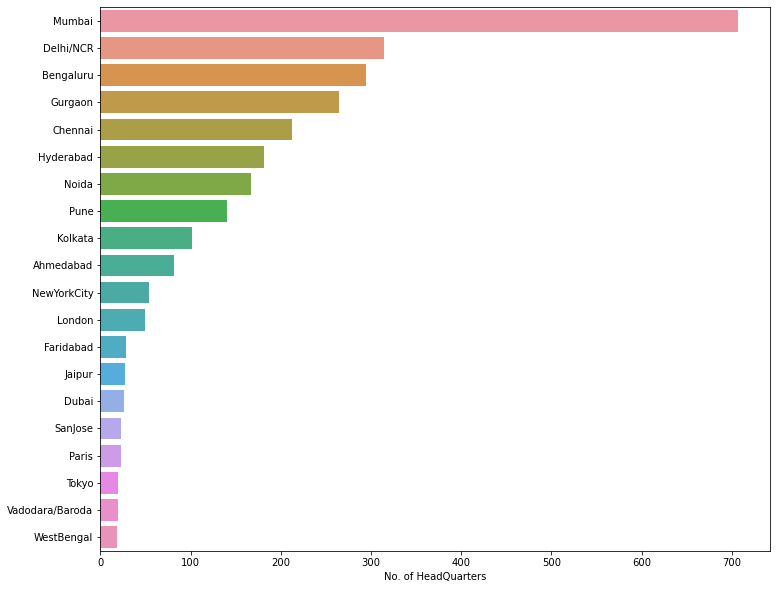

In [432]:
plt.figure(figsize=(12,10))
sns.barplot(x=chains, y=chains.index)
plt.xlabel('No. of HeadQuarters')
plt.show()

### Distribution of Company_type

In [433]:
typ=final_df['Company_type'].value_counts()
typ

Private                                     2785
Public                                      1128
JV                                            26
LLP                                           15
Government                                    13
Partnership                                   11
LLC                                           11
NGO/NPO                                        9
Govt Organisation                              7
Other                                          3
Central Public Sector Enterprises (CPSE)       1
Conglomerate                                   1
Proprietorship                                 1
Name: Company_type, dtype: int64

In [434]:
typ.index

Index(['Private', 'Public', 'JV', 'LLP', 'Government', 'Partnership', 'LLC',
       'NGO/NPO', 'Govt Organisation', 'Other',
       'Central Public Sector Enterprises (CPSE)', 'Conglomerate',
       'Proprietorship'],
      dtype='object')

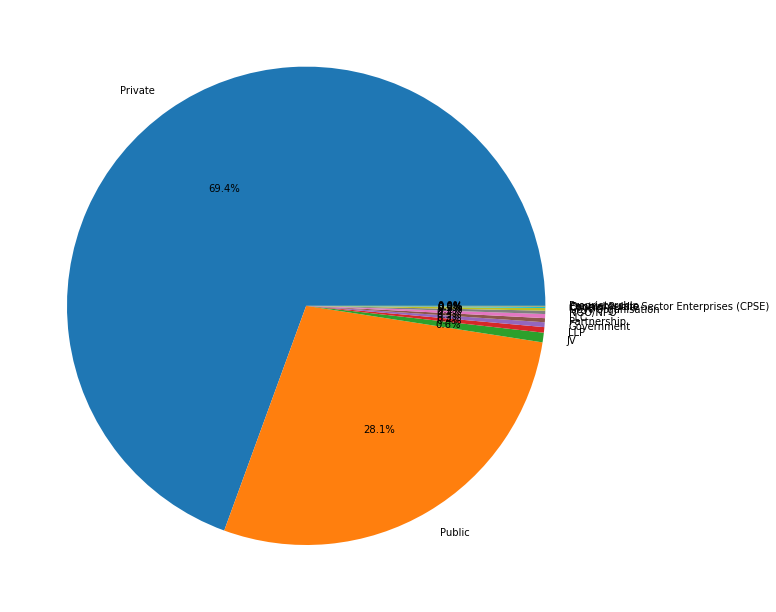

In [435]:
plt.figure(figsize=(12,11))
plt.pie(typ, labels=typ.index, autopct='%0.1f%%')
plt.show()

### Companies with max Reviews

In [436]:
r2=final_df.groupby('Company_name')['Reviews'].sum().nlargest(20)

In [437]:
r2.index

Index(['TCS', 'Reliance Industr...', 'Mahindra & Mahin...', 'HDFC Bank',
       'ICICI Bank', 'Accenture', 'Cognizant', 'Wipro', 'Infosys',
       'Larsen & Toubro ...', 'Capgemini', 'Tech Mahindra', 'Genpact',
       'Amazon', 'Axis Bank', 'HCLTech', 'Hinduja Group', 'Reliance Retail',
       'IBM', 'Concentrix Corpo...'],
      dtype='object', name='Company_name')

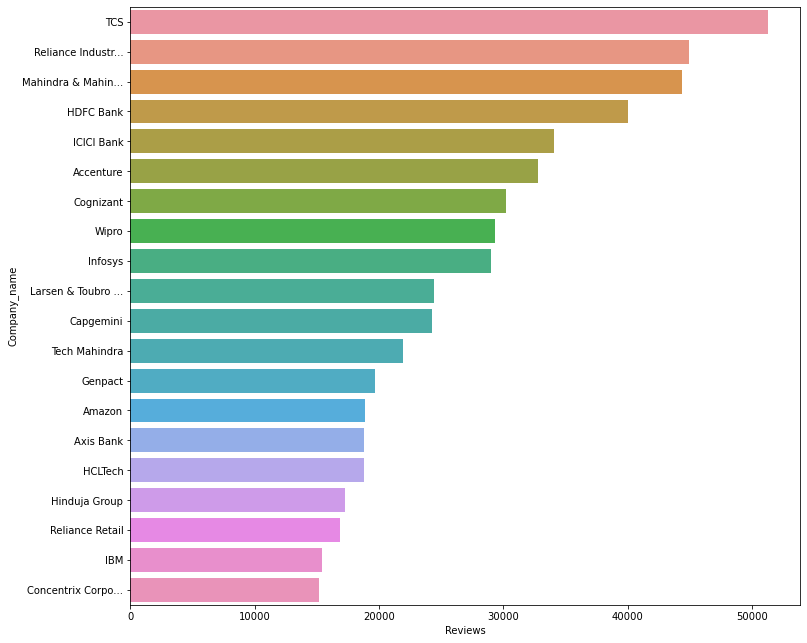

In [438]:
plt.figure(figsize=(12,11))
sns.barplot(x=r2, y=r2.index)
plt.show()

### Companies with most no. of locations

In [440]:
loca=final_df.groupby('Company_name')['Locations across the Globe'].sum().nlargest(20)

In [441]:
loca.index

Index(['HDFC Bank', 'Axis Bank', 'ICICI Bank', 'Reliance jio',
       'Mahindra & Mahin...', 'HDB Financial Se...', 'Reliance Retail',
       'Shriram Transpor...', 'Bajaj Finserv', 'Bajaj Finance',
       'IndusInd Bank', 'Vodafone Idea', 'Bandhan Bank', 'Bharti Airtel',
       'Larsen & Toubro ...', 'ICICI Prudential...', 'IIFL',
       'Reliance Industr...', 'Ecom Express', 'Cholamandalam In...'],
      dtype='object', name='Company_name')

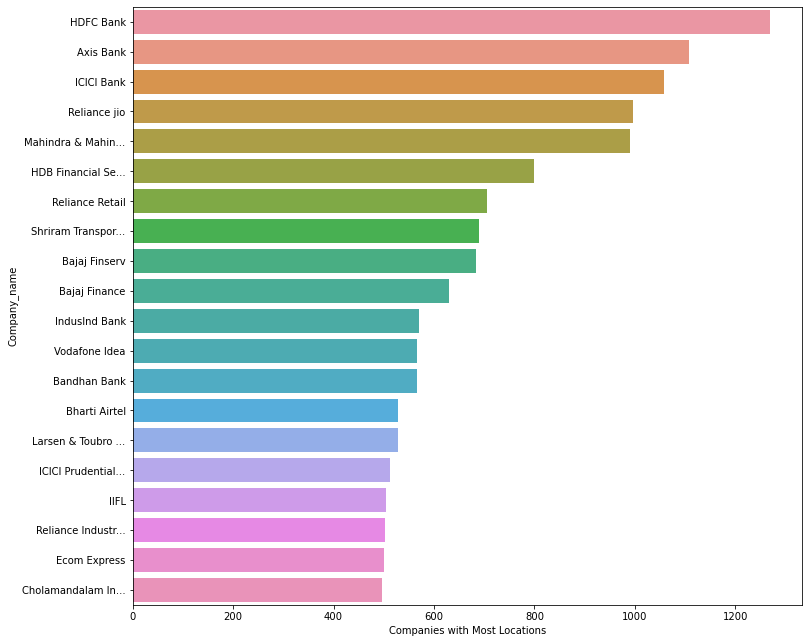

In [442]:
plt.figure(figsize=(12,11))
sns.barplot(x=loca, y=loca.index)
plt.xlabel('Companies with Most Locations')
plt.show()

### Give an estimate on the companies lying betweem  3.0-5.0 in Rating.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


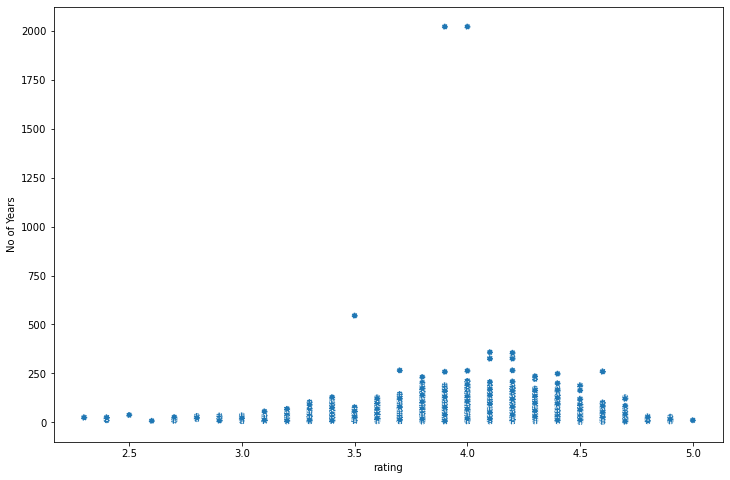

In [443]:
plt.figure(figsize=(12,8))
sns.scatterplot(final_df['Rating'], final_df['Total_no_of_years'], linewidth=1, linestyle=':')
plt.xlabel('rating')
plt.ylabel('No of Years')
plt.show()

# from here we can see that, most of the companies which have around 20-30 years to 160-180 years of presence lies between 3.0 - 4.6 in rating. 

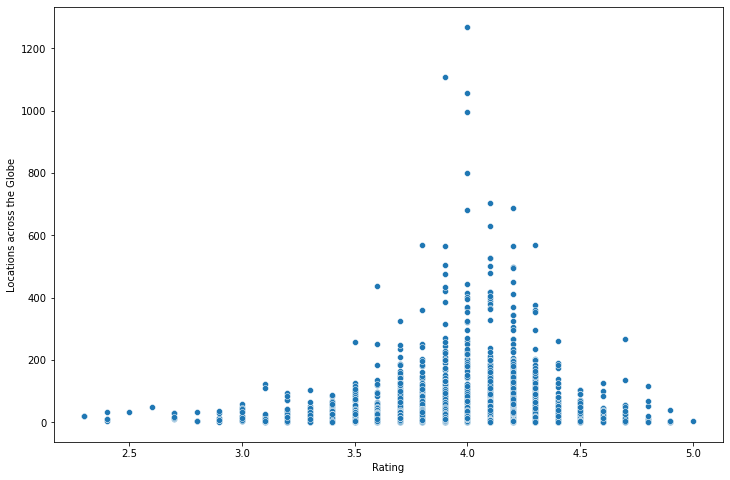

In [444]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=final_df['Rating'], y=final_df['Locations across the Globe'])
plt.show()

### Companies with there founding year

In [445]:
final_df.groupby('Company_name')['Total_no_of_years'].sum().nlargest(20)

Company_name
Prodapt Solution...    2023
TDK India              2023
Oxford Universit...     545
Army Medical Cor...     518
Saint-Gobain            358
Merck Life Scien...     355
Pinkerton               346
Barclays                333
Aviva Life Insur...     327
London Stock Exc...     325
Refinitiv               325
Amcor Flexibles ...     318
Allanasons              316
Cox & Kings             265
MAN Truck & Bus         265
Hamleys                 263
Forbes & Company        258
Ordnance Factory        248
King George's Me...     236
EID Parry (India...     235
Name: Total_no_of_years, dtype: int32

In [446]:
final_df['Company_name'][1131]

'Prodapt Solution...'

In [447]:
final_df[final_df['Total_no_of_years']==2023]

,Company_name,Rating,Reviews,Company_type,Employees,Total_no_of_years,City,State/Country,Locations across the Globe,Work_location
1131,Prodapt Solution...,3.9,443,Private,1k-5k,2023,Chennai,TamilNadu,7,India
1254,TDK India,4.0,403,Private,1k-5k,2023,Nashik,Maharashtra,19,India


In [448]:
final_df.set_index('Company_name',inplace=True)

In [449]:
final_df.drop(['Prodapt Solution...', 'TDK India'], inplace=True)

In [450]:
final_df.reset_index(inplace=True)

In [451]:
comp=final_df.groupby('Company_name')['Total_no_of_years'].sum().nlargest(20)
comp

Company_name
Oxford Universit...    545
Army Medical Cor...    518
Saint-Gobain           358
Merck Life Scien...    355
Pinkerton              346
Barclays               333
Aviva Life Insur...    327
London Stock Exc...    325
Refinitiv              325
Amcor Flexibles ...    318
Allanasons             316
Cox & Kings            265
MAN Truck & Bus        265
Hamleys                263
Forbes & Company       258
Ordnance Factory       248
King George's Me...    236
EID Parry (India...    235
Fidelity Nationa...    231
State Street Cor...    231
Name: Total_no_of_years, dtype: int32

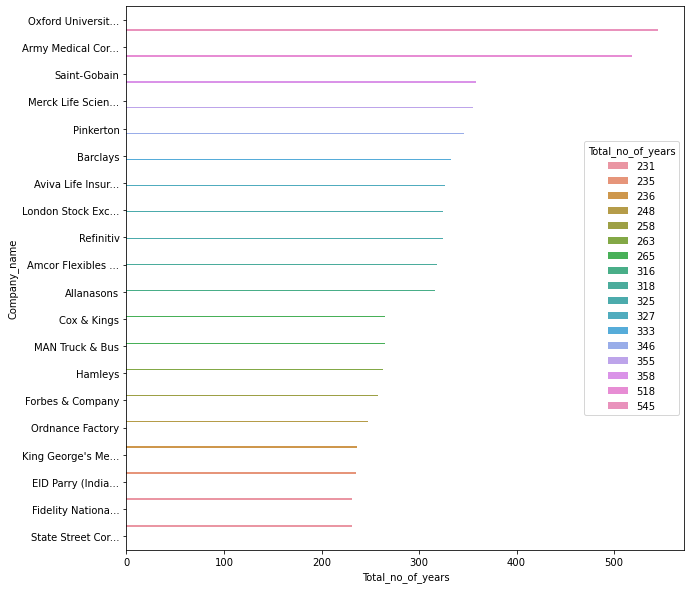

In [452]:
plt.figure(figsize=(10,10))
sns.barplot(x=comp, y=comp.index, hue=comp, data=final_df)
plt.show()

### Which section of the Employees are the highest

In [461]:
emp=final_df['Employees'].value_counts()
emp

1k-5k        1678
501-1k        804
201-500       523
10k-50k       319
5k-10k        290
51-200        254
1Lakh+         46
11-50          45
50k-1Lakh      34
1-10           16
Name: Employees, dtype: int64

In [454]:
final_df.sample(5)

,Company_name,Rating,Reviews,Company_type,Employees,Total_no_of_years,City,State/Country,Locations across the Globe,Work_location
3265,Jindal Industrie...,3.3,149,Public,1k-5k,71,Delhi/NCR,Delhi,16,Global
2946,Murugappa Group,4.1,6300,Private,50k-1Lakh,123,Chennai,TamilNadu,54,India
3190,US Tech Solution...,4.0,153,Private,201-500,23,NewJersey,NewJersey,8,India
3074,Polyplex,4.4,159,Public,1k-5k,39,Noida,UttarPradesh,9,India
1177,Diebold Nixdorf,4.1,403,Private,1k-5k,31,NorthCanton,Ohio,34,India


In [455]:
final_df['Employees'].unique()

array(['1Lakh+', '50k-1Lakh', '10k-50k', '1k-5k', '5k-10k', '201-500',
       '501-1k', '51-200', '11-50', '1-10'], dtype=object)

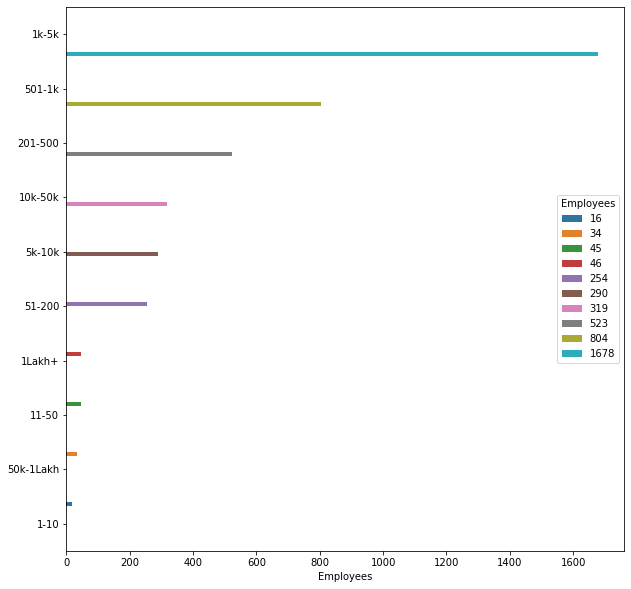

In [462]:
plt.figure(figsize=(10,10))
sns.barplot(x=emp, y=emp.index, hue=emp)
plt.show()

### Distribution on the basis of Work location

In [463]:
final_df['Work_location'].unique()

array(['India', 'Global'], dtype=object)

In [464]:
final_df['Work_location']=final_df['Work_location'].str.replace(' ','')

In [465]:
final_df['Work_location'].unique()

array(['India', 'Global'], dtype=object)

<AxesSubplot:>

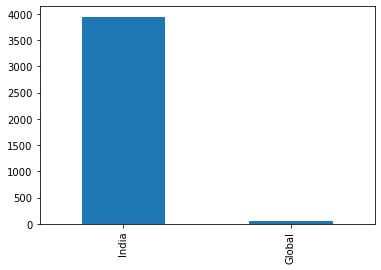

In [466]:
# most favoured work location on ambition box page
final_df['Work_location'].value_counts().plot(kind='bar')

### Top Rated Companies

In [467]:
rate=final_df.groupby('Company_name')['Rating'].max().nlargest(10)
rate

Company_name
Hummingwave Tech...    5.0
Aurigo                 4.9
Claritus Managem...    4.9
E2logy Software ...    4.9
Hire Glocal            4.9
Online Legal Ind...    4.9
Sistema Shyam Te...    4.9
Zovian Technolog...    4.9
75way Technologi...    4.8
AYN InfoTech           4.8
Name: Rating, dtype: float64

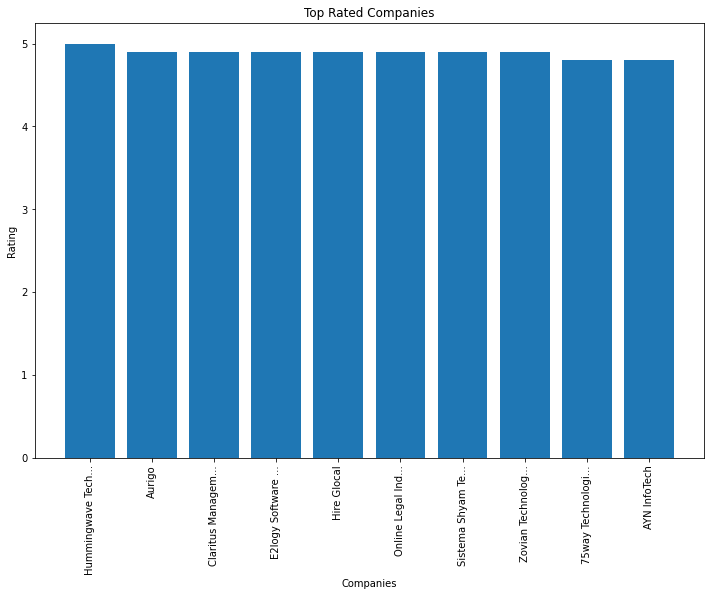

In [468]:
plt.figure(figsize=(12,8))
plt.bar(rate.index, rate)
plt.title('Top Rated Companies')
plt.xlabel('Companies')
plt.ylabel('Rating')
plt.xticks(rotation='vertical')
plt.show()

### Converting the updated dataset into a csv file

In [ ]:
final_df.to_csv('data_analysis_project.csv')